<a id='Top'></a>

# Yelp Recommender System Project
## Part 2 Exploratory Data Analysis

### Overview

1. <a href='#Businesses'>Businesses</a>
1. <a href='#Reviews'>Reviews</a>
1. <a href='#Users'>Users</a> 

_The datasets were cleaned and filtered in the data wrangling part of this project (see Data wrangling notebook for details). Note that the datasets used here contain only __food and restaurant__ related businesses, users, and reviews._

In [126]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.image as mpimg
from mpl_toolkits.basemap import Basemap
from ast import literal_eval
from collections import defaultdict
from datetime import date, timedelta

In [3]:
# Load data
businesses = pd.read_csv('food_restaurant_business.csv', index_col=0)
reviews = pd.read_csv('food_restaurant_review.csv', index_col=0)
users = pd.read_csv('food_restaurant_user.csv', index_col=0)

C:\Users\math4\AppData\Local\conda\conda\envs\Springboard\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Now I will explore each of the datasets.

<a id='Businesses'></a>

### 1. Businesses

In [4]:
businesses.head(3)

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,restaurant,food,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsTakeOut
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,Calgary,AB,51.091813,-114.031675,4.0,24,1,"['Tours', 'Breweries', 'Pizza', 'Restaurants',...",1,1,1.0,2.0,1.0
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,Henderson,NV,35.960734,-114.939821,4.5,3,0,"['Chicken Wings', 'Burgers', 'Caterers', 'Stre...",1,1,1.0,2.0,1.0
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,MontrÃ©al,QC,45.540503,-73.599300,4.0,5,0,"['Breakfast & Brunch', 'Restaurants', 'French'...",1,0,0.0,2.0,0.0


In [5]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72624 entries, 0 to 188590
Data columns (total 15 columns):
business_id                   72624 non-null object
name                          72624 non-null object
city                          72624 non-null object
state                         72624 non-null object
latitude                      72624 non-null float64
longitude                     72624 non-null float64
stars                         72624 non-null float64
review_count                  72624 non-null int64
is_open                       72624 non-null int64
categories                    72624 non-null object
restaurant                    72624 non-null int64
food                          72624 non-null int64
BusinessAcceptsCreditCards    72624 non-null float64
RestaurantsPriceRange2        72624 non-null float64
RestaurantsTakeOut            72624 non-null float64
dtypes: float64(6), int64(4), object(5)
memory usage: 8.9+ MB


- 72624 food and restaurant businesses
- 15 features 

I will explore each of important features.

#### City

In [6]:
businesses.city.nunique()

818

In [7]:
print(sorted(businesses.city.unique()))

['AGINCOURT', 'Agincourt', 'Ahwatukee', 'Airdrie', 'Ajax', 'Allison Park', 'Ambridge', 'Amherst', 'Ange-Gardien', 'Angus', 'Anjou', 'Anthem', 'Argos', 'Arnold', 'Ashburn', 'Aspinwall', 'Auburn', 'Auburn Township', 'Auburn Twp', 'Aurora', 'Avalon', 'Avon', 'Avon Lake', 'Avondale', "Baie-D'urfe", "Baie-d'UrfÃ©", 'Bainbridge', 'Bainbridge Township', 'Baldwin', 'Balzac', 'Banksville', 'Bath', 'Bay Village', 'Beachwood', 'Beaconsfield', 'Beauharnois', 'Bedford', 'Bedford Heights', 'Bedford Hts.', 'Beeton', 'Bell', 'Bellagio', 'Belleville', 'Bellevue', 'Bellvue', 'Belmont', 'Beloeil', 'Ben Avon', 'Berea', 'Bethel Park', 'Black Earth', 'Blainville', 'Blakeney', 'Blawnox', 'Bloomfield', 'Blue Diamond', 'Bois-Des-Filion', 'Bois-des-Filion', 'Boisbriand', 'Bolton', 'Bond Head', 'Boucherville', 'Boulder City', 'Braddock', 'Bradford', 'Bradford West Gwillimbury', 'Brampton', 'Bratenahl', 'Brecksville', 'Brentwood', 'Brettin', 'Bridgeville', 'Bright', 'Broadview Heights', 'Brook Park', 'Brooklin', 

- These 818 cities are not cleaned. 
  - For example, there are many representations for Las Vegas; they are 'Las  Vegas', 'Las Vegas', 'Las vegas', 'LasVegas', 'las vegas'. 
  - Also Toronto is represented as  'Downtown Toronto', 'North Toronto', 'Tornto', 'Toronto', and 'toronto'. 
  - If I am going to use city names for my recommender system, I will clean relevant city names. Since I noticed that Toronto and Las Vegas have many other names in the dataset, I will fix the city names only for these two cities for now.
- I also need to check if there are any same name cities in different states or countries.

_Fixing Toronto and Las Vegas_

In [8]:
businesses[businesses.city=='Tornto']

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,restaurant,food,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsTakeOut
92869,I9dtHZMPnhgatLqni6EJrA,Wahlburgers,Tornto,ON,43.678335,-79.611824,2.5,138,1,"['American (Traditional)', 'Burgers', 'America...",1,0,1.0,2.0,1.0


This is actually in Toronto (not Tornto).

In [9]:
businesses[businesses.city=='Henderson and Las vegas']

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,restaurant,food,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsTakeOut
187102,NiYCc7bhbQXftDQPON1aaQ,Just Rollin',Henderson and Las vegas,NV,36.039525,-114.981721,4.0,7,1,"['Food', 'Street Vendors']",0,1,1.0,1.0,1.0


The latitude and longtitude show this business is in Henderson, NV.

In [10]:
businesses['city']=businesses.city.replace({'Henderson and Las vegas':'Henderson'})

In [11]:
def unify_city_names(df, col_name, possible_names, correct_name):
    '''
    This function correct all possible city names to a correct name
    '''
    correct_dict = dict(zip(possible_names,[correct_name]*len(possible_names)))
    print(correct_dict)
    df[col_name]=df[col_name].replace(correct_dict)

In [12]:
# Fix city names for Toronto
Toronto_names = ['Downtown Toronto', 'North Toronto', 'Tornto', 'Toronto', 'toronto']
unify_city_names(businesses, 'city', Toronto_names, 'Toronto')

{'Downtown Toronto': 'Toronto', 'North Toronto': 'Toronto', 'Tornto': 'Toronto', 'Toronto': 'Toronto', 'toronto': 'Toronto'}


In [13]:
# Fix city names for Las Vegas
Las_Vegas_names=['Las  Vegas', 'Las Vegas', 'Las vegas', 'LasVegas', 'las vegas']
unify_city_names(businesses, 'city', Las_Vegas_names, 'Las Vegas')

{'Las  Vegas': 'Las Vegas', 'Las Vegas': 'Las Vegas', 'Las vegas': 'Las Vegas', 'LasVegas': 'Las Vegas', 'las vegas': 'Las Vegas'}


Now the city names are fixed.

In [14]:
businesses.city.nunique()

809

_Make a column for both city and state_

In [15]:
businesses['city_state'] = businesses[['city','state']].apply(lambda x: ', '.join(x), axis=1)
businesses['city_state'][:5]

0      Calgary, AB
1    Henderson, NV
2    MontrÃ©al, QC
5      Phoenix, AZ
6      Toronto, ON
Name: city_state, dtype: object

In [16]:
businesses.city_state.nunique()

840

There are indeed cities with same names!! I will find out those cities.

In [17]:
city_state = pd.Series(businesses.city_state.unique())
unique_city_count = city_state.apply(lambda x: x.split(",")[0]).value_counts()
unique_city_count[unique_city_count>1]

Montreal         3
Concord          3
Laval            3
Verona           3
Whitby           3
Hudson           2
Brooklyn         2
Monroeville      2
Westmount        2
Phoenix          2
Calgary          2
Bedford          2
Chandler         2
Aurora           2
Fort Mill        2
Davidson         2
Parma            2
Indian Land      2
Vanier           2
Clark            2
Madison          2
Airdrie          2
North Olmsted    2
Richmond Hill    2
Scarborough      2
Henderson        2
North York       2
Trafford         2
Pickering        2
Downtown         2
Willoughby       2
dtype: int64

In [18]:
# States with city name 'Montreal'
businesses[businesses.city == 'Concord']['state'].unique()

array(['NC', 'ON', 'OH'], dtype=object)

For example, the cities named 'Concord' are in 3 states, 'NC', 'ON', and 'OH'.

__Top ten cities__

In [19]:
# Top ten cities
top_ten_cities = businesses.city_state.value_counts()[:10]
top_ten_cities

Toronto, ON        9681
Las Vegas, NV      7980
Phoenix, AZ        4962
MontrÃ©al, QC      4251
Calgary, AB        3564
Charlotte, NC      3354
Pittsburgh, PA     3009
Scottsdale, AZ     1954
Cleveland, OH      1774
Mississauga, ON    1678
Name: city_state, dtype: int64

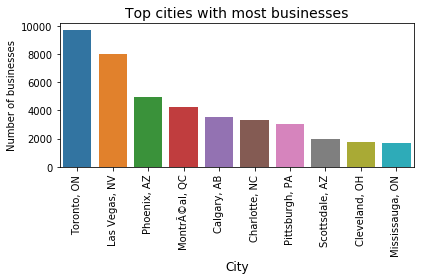

In [20]:
ax = sns.barplot(top_ten_cities.index, top_ten_cities.values)
plt.title("Top cities with most businesses", size=14)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel('Number of businesses')
plt.xlabel('City', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("top_ten_cities.png",format="png", dpi=300)
plt.show()

The top city is Toronto, ON and the second top is Las Vegas, NV. The top ten cities are all in Canada or United States.

#### Longitude and Latitude

In [21]:
# code from https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

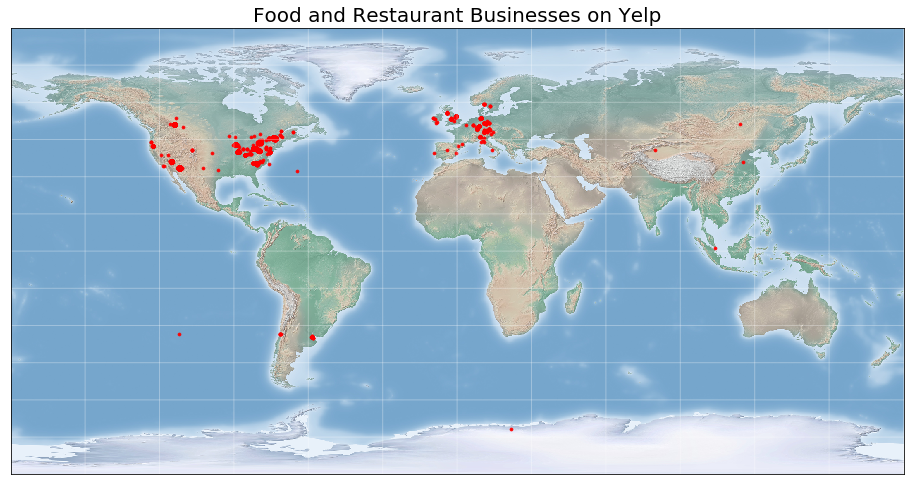

In [22]:
# Basemap
fig = plt.figure(figsize=(16, 12), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

# Add businesses
mxy = m(list(businesses.longitude), list(businesses.latitude))
m.scatter(mxy[0], mxy[1], s=3, c="red", alpha=.9, lw=2)
plt.title("Food and Restaurant Businesses on Yelp", size=20)
plt.savefig("business_map_world.png",format="png", dpi=300)
plt.show()

The world map shows most of food and restaurant businesses on this dataset are in North America and Europe. There are a few businesses in South America and Asia. Some dots on the ocean might represent businesses in some islands. There is even one in Antarctica???

In [23]:
businesses[businesses.latitude == businesses.latitude.min()]

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,restaurant,food,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsTakeOut,city_state
71134,9LVNrBTJzaBhqqMJs3btHg,Fresh Catch,Turks and Caicos Islands,FL,-71.753941,21.756962,4.0,17,1,"['Food Trucks', 'Caribbean', 'Restaurants', 'A...",1,1,1.0,2.0,1.0,"Turks and Caicos Islands, FL"


This business is actually in Turks and Caicos Islands, not in Antarctica. I found swapping its latitude and longitude makes the correct location for Turks and Caicos Islands.

In [24]:
businesses.at[71134,'latitude'] = 21.756962
businesses.at[71134,'longitude'] = -71.753941

In [25]:
businesses[businesses.index == 71134]

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,restaurant,food,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsTakeOut,city_state
71134,9LVNrBTJzaBhqqMJs3btHg,Fresh Catch,Turks and Caicos Islands,FL,21.756962,-71.753941,4.0,17,1,"['Food Trucks', 'Caribbean', 'Restaurants', 'A...",1,1,1.0,2.0,1.0,"Turks and Caicos Islands, FL"


In [ ]:
co businesses.stars

#### Stars

The 'stars' column contains the average stars received for each business.

In [26]:
businesses.stars.mean()

3.4920343137254903

The food and restaurant businesses received 3.49 stars on average.

In [27]:
star_counts = businesses.stars.value_counts().sort_index()
star_counts

1.0      526
1.5     1516
2.0     3947
2.5     7153
3.0    12460
3.5    16750
4.0    17470
4.5     9732
5.0     3070
Name: stars, dtype: int64

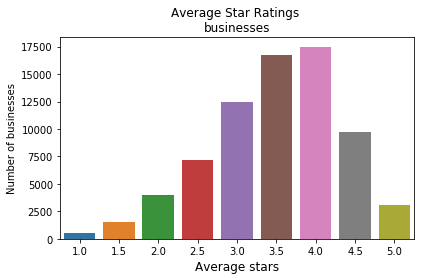

In [28]:
ax = sns.barplot(star_counts.index, star_counts.values)
plt.title("Average Star Ratings \nbusinesses")
plt.ylabel('Number of businesses')
plt.xlabel('Average stars', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("star_counts_business.png",format="png", dpi=300)
plt.show()

The distribution of average stars are slightly left-skewed and peaked at 4 stars. In other words, the number of businesses increases as average stars increase, but drops after star rating 4. This trend might show that businesses with higher stars are more likely to survive and average stars over 4.5 are difficult for businesses to get (so there are a little less of them). 

#### Review count

In [29]:
businesses.review_count.describe()

count    72624.000000
mean        55.323571
std        146.925646
min          3.000000
25%          6.000000
50%         16.000000
75%         49.000000
max       7968.000000
Name: review_count, dtype: float64

The above shows the distribution of review counts.

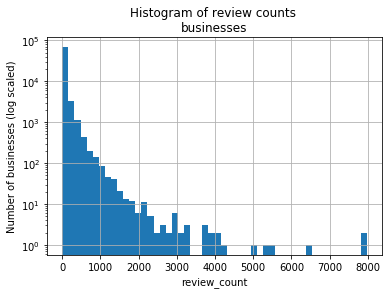

In [30]:
businesses.review_count.hist(bins=50)
plt.yscale('log')
plt.title('Histogram of review counts \nbusinesses')
plt.ylabel('Number of businesses (log scaled)')
plt.xlabel('review_count')
plt.show()

The distribution of review counts is highly right-skewed. The histogram shows there are 6 businesses with extreme numbers of reviews over 4500. I will check what they are.

_Top review count businesses_

In [31]:
top_review_count_businesses = businesses[businesses.review_count > 4500].sort_values(by='review_count', ascending=False)

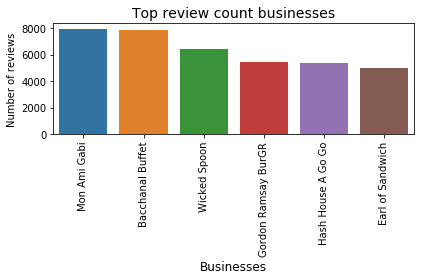

In [32]:
ax = sns.barplot(top_review_count_businesses.name, top_review_count_businesses.review_count)
plt.title("Top review count businesses", size=14)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel('Number of reviews')
plt.xlabel('Businesses', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("top_review_counts_businesses.png",format="png", dpi=300)
plt.show()

In [33]:
top_review_count_businesses[['name','restaurant','city_state', 'stars', 'RestaurantsPriceRange2', 'review_count']]

,name,restaurant,city_state,stars,RestaurantsPriceRange2,review_count
137635,Mon Ami Gabi,1,"Las Vegas, NV",4.0,2.0,7968
185167,Bacchanal Buffet,1,"Las Vegas, NV",4.0,3.0,7866
62723,Wicked Spoon,1,"Las Vegas, NV",3.5,3.0,6446
188309,Gordon Ramsay BurGR,1,"Las Vegas, NV",4.0,2.0,5472
170129,Hash House A Go Go,1,"Las Vegas, NV",4.0,2.0,5382
177573,Earl of Sandwich,1,"Las Vegas, NV",4.5,1.0,4981


All of them are restaurants in Las Vegas, NV!! Their average stars are all higher than the mean stars (3.49).Thier price ranges are higher than the average (1.7) except for one.

This makes me wonder two things:
- Which cities have the most reviews
- Whether highly rated businesses (higher stars) tend to get more reviews
- Whether more expensive businesses tend to get more reviews

The last question will be answered in the price range section since the column has not been investigated yet.

_Top review count cities_

In [34]:
# Top 10 cities with the most reviews
top_review_count_cities = businesses.groupby(['city_state'])['review_count'].sum().sort_values(ascending=False)[:10]

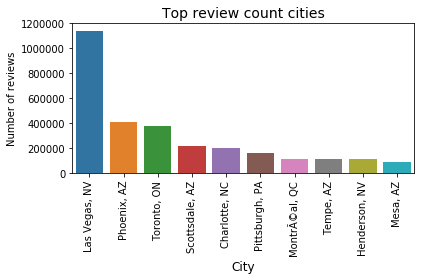

In [35]:
ax = sns.barplot(top_review_count_cities.index, top_review_count_cities.values)
plt.title("Top review count cities", size=14)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel('Number of reviews')
plt.xlabel('City', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("top_review_count_cities.png",format="png", dpi=300)
plt.show()

- The city with the most number of reviews over 1 million is Las Vegas, NV. The total review count of Las Vegas is almost 3 times higher than that of Phoenix, the city with the second most reviews. Note that the 9th city, Henderson is also part of the Las Vegas metropolita area.
- Toronto is the third although it has the largest number of food and restaurant businesses in this dataset. 

_Do highly rated businesses tend to have more reveiws?_

To answer this question, I need to filter out some businesses with too few reviews since their average stars are not credible. I will include businesses with at least 20 reviews for this analysis.

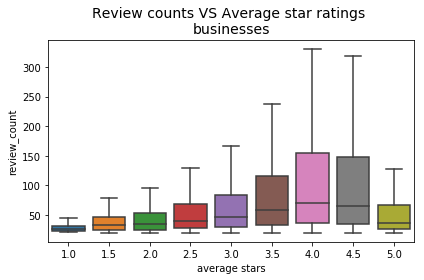

In [36]:
review_count_stars_business = businesses[businesses.review_count >= 20][['review_count', 'stars']]

sns.boxplot(x='stars', y='review_count', data=review_count_stars_business,
           showfliers=False) # remove outliers
plt.title('Review counts VS Average star ratings \nbusinesses', size=14)
plt.xlabel('average stars')
plt.tight_layout() # need for savefig
plt.savefig("review_count_stars_business.png",format="png", dpi=300)
plt.show()

- The above boxplots are not showing outliers (I used showfliers=False for this option) since they make it hard to see the overall patterns; I cannot see the boxes well if outliers are drawn.
- The graph shows that higly rated businesses tend to have more reviews with some exceptions. The review counts decrease a little after star rating 4 (for the two highest stars 4.5 and 5). 

#### Price range

In [37]:
businesses.RestaurantsPriceRange2.mean(), businesses.RestaurantsPriceRange2.median()

(1.7060888962326504, 2.0)

In [38]:
price_range_counts = businesses.RestaurantsPriceRange2.value_counts().sort_index()

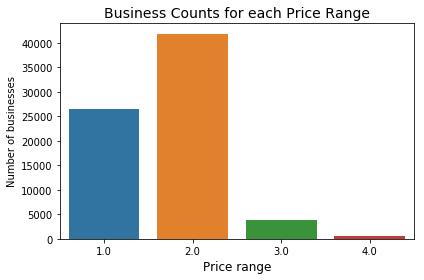

In [39]:
ax = sns.barplot(price_range_counts.index, price_range_counts.values)
plt.title("Business Counts for each Price Range", size=14)
plt.ylabel('Number of businesses')
plt.xlabel('Price range', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("price_range_counts.png",format="png", dpi=300)
plt.show()

The most common price range is 2 (same as median) and then 1 and there are much fewer businesses with price range 3 and 4.

_Do more expensive businesses tend to get more reviews?_

In [40]:
average_review_counts_per_pricerange = businesses.groupby('RestaurantsPriceRange2')['review_count'].mean()
median_review_counts_per_pricerange = businesses.groupby('RestaurantsPriceRange2')['review_count'].median()

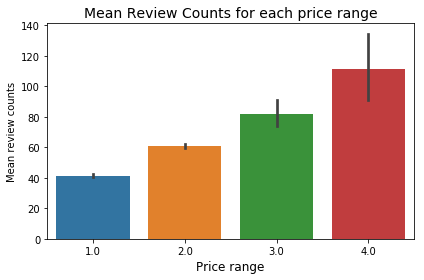

In [41]:
#ax = sns.barplot(average_review_counts_per_pricerange.index, average_review_counts_per_pricerange.values)
sns.barplot(x='RestaurantsPriceRange2', y='review_count', data=businesses)
plt.title("Mean Review Counts for each price range", size=14)
plt.ylabel('Mean review counts')
plt.xlabel('Price range', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("average_review_counts_per_pricerange.png",format="png", dpi=300)
plt.show()

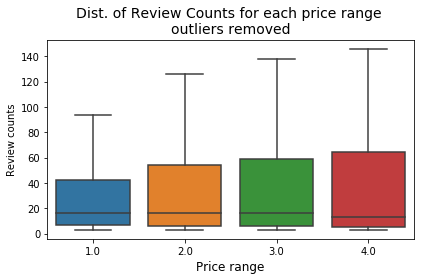

In [42]:
#ax = sns.barplot(median_review_counts_per_pricerange.index, median_review_counts_per_pricerange.values)
sns.boxplot(x='RestaurantsPriceRange2', y='review_count', data=businesses,
           showfliers=False)
plt.title("Dist. of Review Counts for each price range \noutliers removed", size=14)
plt.ylabel('Review counts')
plt.xlabel('Price range', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("median_review_counts_per_pricerange.png",format="png", dpi=300)
plt.show()

The barplot for mean review counts seems to show people are more likely to leave reviews for more expensive food and restaurant businesses.  However, the distribution of review counts show there are not much difference in medians of review counts among different price ranges (outliers were removed to see the boxes). Moreover, businesses with the highest price range (4) have the lowest median review counts. Why? This could be because the review counts are highly right-skewed with extremely high review counts as seen in the review count section. See below for more explanation.

In [43]:
# violin plot (all)
#ax = sns.violinplot(x='RestaurantsPriceRange2', y='review_count', data=businesses,
#                   scale='count') #width of the violins scaled by the number of observations
#plt.xlabel('Price Range')
##ax.set(yscale="log")
#plt.show()

90% quantile review count: 129.0


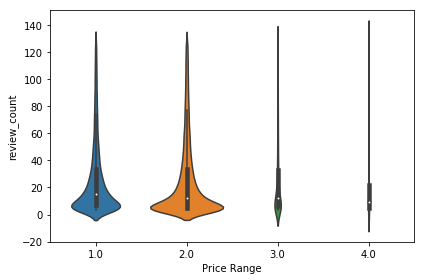

In [44]:
# Only with lower 90% quantiles
cutoff = businesses.review_count.quantile(.9)
print('90% quantile review count:', cutoff)

ax = sns.violinplot(x='RestaurantsPriceRange2', y='review_count', 
                    data=businesses[businesses.review_count < cutoff],
                    scale = 'count') #each violin has the same area (default)
plt.xlabel('Price Range')
plt.tight_layout() # need for savefig
plt.savefig("review_counts_per_pricerange_90quantile_violin.png",format="png", dpi=300)
plt.show()

- This violin plots with all points show extreme review counts, which make it difficult to view a pattern in the normal range of review counts. Thus, I filtered out the top 10% of review counts to see the pattern in the 90% of data. 
- The extremely high review counts for higher price ranges (3 and 4) could have been more influential to the mean review counts since ther are much fewer businesses with price range 3 and 4. The first graph in the price range section showed the number of businesses for each price range differ a lot. I also used scale='count' in the above violin plot to show the differences in counts. The argument scale='count' makes the width of the violins scaled by the number of observations. 

_Do more expensive businesses receive higher star ratings?_

In [45]:
# average stars per price range
businesses.groupby('RestaurantsPriceRange2')['stars'].mean()

RestaurantsPriceRange2
1.0    3.464138
2.0    3.500717
3.0    3.577609
4.0    3.571987
Name: stars, dtype: float64

The mean for each price range shows that average stars tend to be slightly higher for more expensive businesses, but the differences are very small. 

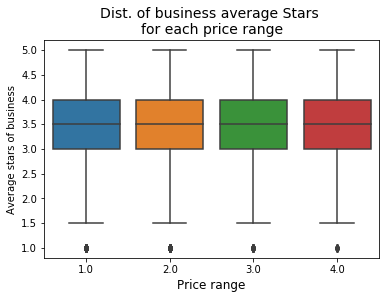

In [124]:
sns.boxplot(x='RestaurantsPriceRange2', y='stars', data=businesses)
plt.title("Dist. of business average Stars \nfor each price range", size=14)
plt.ylabel('Average stars of business')
plt.xlabel('Price range', fontsize=12)
plt.show()

The boxplots also show the distribution of average stars for business are similar for different price ranges!! This migth suggest price range is not a good predictor when predicting stars, but there might be some interaction with another feature. For example, the ditributions for each price range can vary across different cities (see belwo for an example).

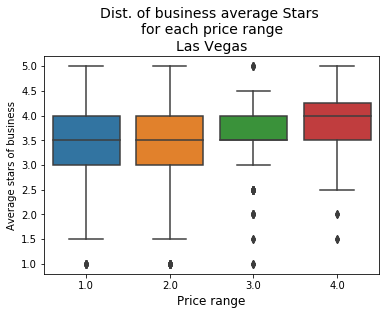

In [125]:
sns.boxplot(x='RestaurantsPriceRange2', y='stars', data=businesses[businesses.city=='Las Vegas'])
plt.title("Dist. of business average Stars \nfor each price range\nLas Vegas", size=14)
plt.ylabel('Average stars of business')
plt.xlabel('Price range', fontsize=12)
plt.show()

In Las Vegas, the average stars of businesses are distributed differently for different price ranges. Price range 1 and 2 are still similar, but not 3 and 4. For range 3 and 4, average stars tend to be more concentrated around 4 stars and low average stars are more likely to be outliers.

#### Categories

In [47]:
businesses['categories'][0]

"['Tours', 'Breweries', 'Pizza', 'Restaurants', 'Food', 'Hotels & Travel']"

I need to chanck these strings back to lists.

In [48]:
businesses['categories'] = businesses['categories'].apply(lambda x: literal_eval(x))

In [49]:
businesses['categories'][0]

['Tours', 'Breweries', 'Pizza', 'Restaurants', 'Food', 'Hotels & Travel']

In [50]:
businesses['categories'].apply(lambda x: len(x)).mean()

3.898669861202908

There are around 4 categories listed for each business on average.

In [51]:
# count categories in the categories column
categories_dic =defaultdict(int)

for categories in businesses['categories']:
    if categories: #if not empty list
        for category in categories:
            categories_dic[category] +=1

len(categories_dic)

809

There are 809 possible categories.

In [52]:
most_common_categories = pd.DataFrame(sorted(categories_dic.items(), key=lambda x: x[1], reverse=True))[:10]
most_common_categories.columns = ['category','count']
most_common_categories

,category,count
0,Restaurants,57173
1,Food,27118
2,Nightlife,8394
3,Bars,8030
4,Coffee & Tea,6936
5,Sandwiches,6912
6,Fast Food,6812
7,American (Traditional),6659
8,Pizza,6603
9,Burgers,5126


The above shows the top most common categories used in the categories column. Note that they are not exclusive categories. 

In [53]:
#ax = sns.barplot(most_common_categories.category, most_common_categories.count)
#plt.title("Most Common Categories \nfood and restaurant businesses")
#locs, labels = plt.xticks()
#plt.setp(labels, rotation=90)
#plt.ylabel('Number of businesses')
#plt.xlabel('Category', fontsize=12)
#plt.tight_layout() # need for savefig
#plt.savefig("most_common_categories.png",format="png", dpi=300)
#plt.show()

<a id='Reviews'></a>

### 2. Reviews

In [54]:
reviews.head(3)

,useful,date,user_id,review_id,cool,funny,business_id,stars
0,0,2011-02-25,msQe1u7Z_XuqjGoqhB0J5g,x7mDIiDB3jEiPGPHOmDzyw,0,0,iCQpiavjjPzJ5_3gPD5Ebg,2
1,0,2012-11-13,msQe1u7Z_XuqjGoqhB0J5g,dDl8zu1vWPdKGihJrwQbpw,0,0,pomGBqfbxcqPv14c3XH-ZQ,5
2,3,2014-10-23,msQe1u7Z_XuqjGoqhB0J5g,LZp4UX5zK3e-c5ZGSeo3kA,1,1,jtQARsP6P-LbkyjbO1qNGg,1


In [55]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017884 entries, 0 to 5996994
Data columns (total 8 columns):
useful         int64
date           object
user_id        object
review_id      object
cool           int64
funny          int64
business_id    object
stars          int64
dtypes: int64(4), object(4)
memory usage: 275.9+ MB


This dataset has around 4 million reviews and 8 columns. 

In [56]:
reviews.describe()

,useful,cool,funny,stars
count,4.017884e+06,4.017884e+06,4.017884e+06,4.017884e+06
mean,1.145554e+00,5.913155e-01,4.709713e-01,3.724650e+00
std,3.470553e+00,2.354701e+00,2.494265e+00,1.365443e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,1.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00
max,1.234000e+03,5.050000e+02,9.910000e+02,5.000000e+00


In [57]:
reviews.columns

Index(['useful', 'date', 'user_id', 'review_id', 'cool', 'funny',
       'business_id', 'stars'],
      dtype='object')

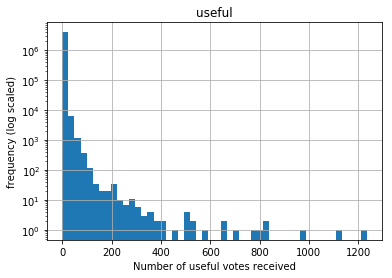

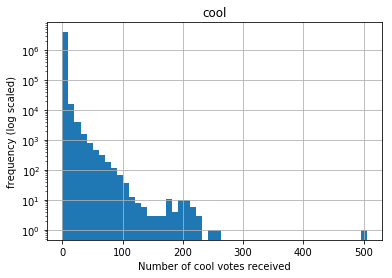

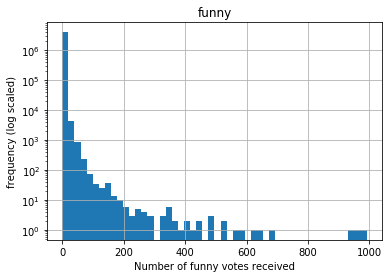

In [58]:
for col in ['useful','cool', 'funny']:
    reviews[col].hist(bins=50)
    plt.yscale('log')
    plt.title(col)
    plt.ylabel('frequency (log scaled)')
    plt.xlabel('Number of '+col+' votes received')
    plt.show()

#### stars

In [59]:
star_counts = reviews.stars.value_counts().sort_index()
star_counts

1     465334
2     373050
3     539861
4    1063999
5    1575640
Name: stars, dtype: int64

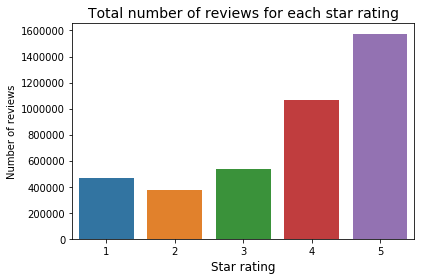

In [60]:
ax = sns.barplot(star_counts.index, star_counts.values)
plt.title("Total number of reviews for each star rating", size=14)
plt.ylabel('Number of reviews')
plt.xlabel('Star rating', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("star_counts_reviews.png",format="png", dpi=300)
plt.show()

The graph shows that reviews with higher ratings are more frequent except for 1 star (1 star is a little more frequent than 2 stars).

90% Quantile of cool votes received: 2.0


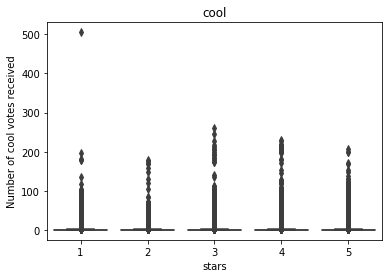

90% Quantile of funny votes received: 1.0


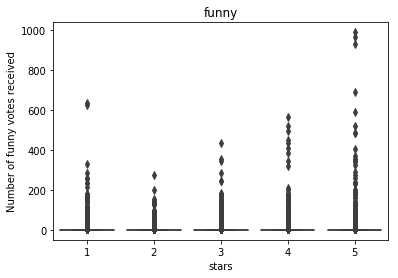

90% Quantile of useful votes received: 3.0


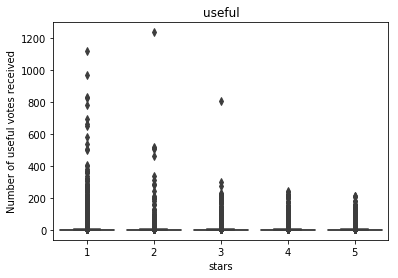

In [61]:
for col in ['cool', 'funny', 'useful']:
    print('90% Quantile of', col, 'votes received:', reviews[col].quantile(.9))
    sns.boxplot(x='stars', y=col, data=reviews[reviews[col]>0])
    plt.ylabel('Number of '+col+' votes received')
    plt.title(col)
    plt.show()

- The boxplots do not show boxes since the majority values are very small less than 3 (see the 90% quantiles printed above each plot). 
- I found the outliers interesting (that's why I include them here); the outliers show that the higher star reviews tend to get more funny votes, but less useful votes!

#### date

In [62]:
reviews.date[:3] 

0    2011-02-25
1    2012-11-13
2    2014-10-23
Name: date, dtype: object

In [63]:
type(reviews.date[0])

str

In [64]:
reviews['date'] = pd.to_datetime(reviews.date)
reviews['date'][:3]

0   2011-02-25
1   2012-11-13
2   2014-10-23
Name: date, dtype: datetime64[ns]

In [65]:
type(reviews.date[0])

pandas._libs.tslib.Timestamp

In [66]:
# first review date
first_day = reviews.date.min()
first_day

Timestamp('2004-10-12 00:00:00')

In [67]:
# Last review date
last_day = reviews.date.max()
last_day

Timestamp('2018-07-02 00:00:00')

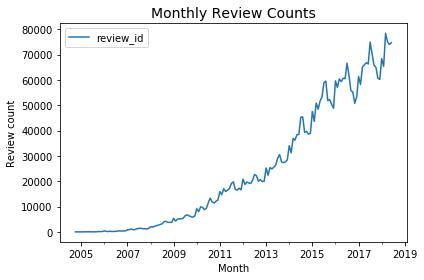

In [68]:
condition = (reviews.date < date(2018,7,1))
reviews[condition][['date','review_id']].set_index('date').resample('M').count().plot()
plt.xlabel('Month')
plt.ylabel('Review count')
plt.title('Monthly Review Counts', size=14)
plt.tight_layout() # need for savefig
plt.savefig("monthly_review_counts.png",format="png", dpi=300)
plt.show()

- I filtered reviews in July, 2018 since this dataset does not include the whole month of reviews for July, 2018.
- Review counts have exponentially increased over time since 2004 and there seems to be seasonal fluctuations. I will look into this pattern more closely only using the recent 3 years of reviews in the next graph.

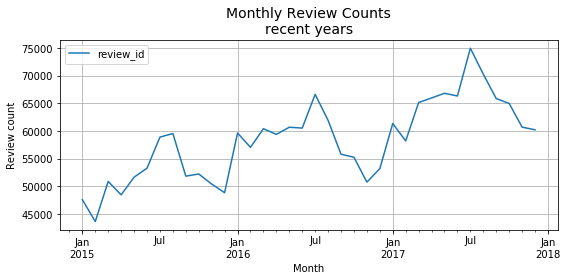

In [69]:
condition = (reviews.date < date(2018,1,1))&(reviews.date >= date(2015,1,1))
reviews[condition][['date','review_id']].set_index('date').resample('M').count().plot(figsize=(8,4))
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Review count')
plt.title('Monthly Review Counts\nrecent years', size=14)
plt.tight_layout() # need for savefig
plt.savefig("monthly_review_counts_recent_years.png",format="png", dpi=300)
plt.show()

There are indeed seasonal fluctuations. The review count drops during winter months and reaches seasonal peaks around July. People probably eat out (or try new restaurants) more during summer and less during winter.

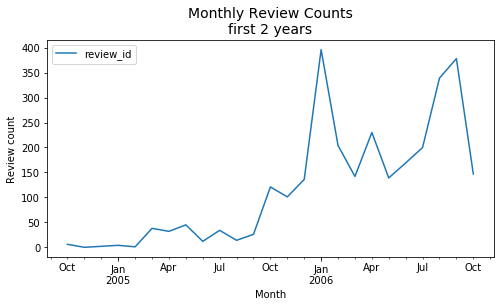

In [70]:
condition = (reviews.date < first_day + timedelta(days=365*2))
reviews[condition][['date','review_id']].set_index('date').resample('M').count().plot(figsize=(8,4))
plt.xlabel('Month')
plt.ylabel('Review count')
plt.title('Monthly Review Counts\nfirst 2 years', size=14)
plt.show()

In the first year, there were not even 100 reviews per month, so I will remove the first 1 year when averaging star ratings for each month below.  

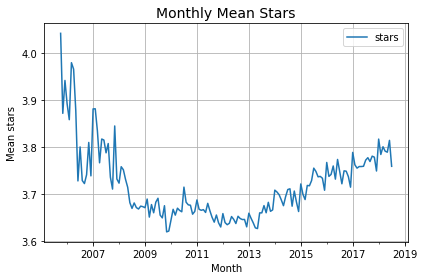

In [71]:
condition = (reviews.date >= first_day + timedelta(days=365))
reviews[condition][['date','stars']].set_index('date').resample('M').mean().plot()
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Mean stars')
plt.title('Monthly Mean Stars', size=14)
plt.tight_layout() # need for savefig
plt.savefig("Monthly_Mean_stars.png",format="png", dpi=300)
plt.show()

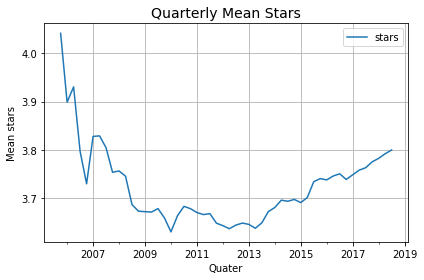

In [72]:
condition = (reviews.date >= first_day + timedelta(days=365))
reviews[condition][['date','stars']].set_index('date').resample('3M').mean().plot()
plt.grid(True)
plt.xlabel('Quater')
plt.ylabel('Mean stars')
plt.title('Quarterly Mean Stars', size=14)
plt.tight_layout() # need for savefig
plt.savefig("Quarterly_Mean_stars.png",format="png", dpi=300)
plt.show()

The monthly average stars had decreased from around 4 to 3.65 until 2013 and then have increased upto 3.8 till now. This is an interesting pattern, which will be more understood in the next graph.

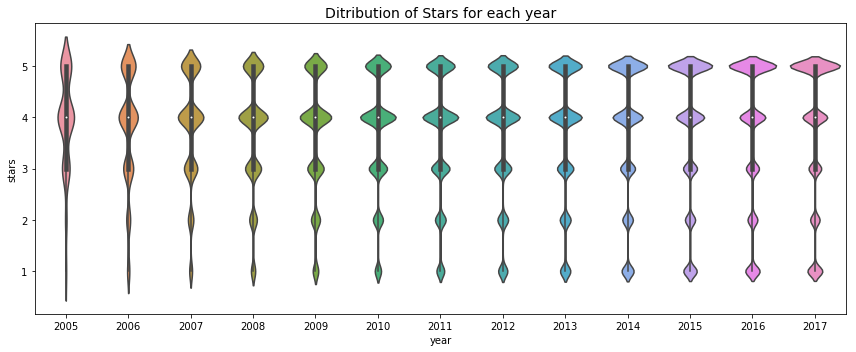

In [73]:
condition = (reviews.date >= first_day + timedelta(days=365))&(reviews.date < date(2018,1,1))
ts = reviews[condition][['date','stars']]
ts['year'] = ts.date.apply(lambda x: x.strftime('%Y'))

fig, ax = plt.subplots(figsize=(12,5))
sns.violinplot(ts.year, ts.stars, ax=ax)
plt.title('Ditribution of Stars for each year', size=14)
plt.tight_layout() # need for savefig
plt.savefig("dist_of_Stars_yearly.png",format="png", dpi=300)
plt.show()

- The above yearly violin plots show how distributions of stars changed over time and explain the quadratic shape we saw in the time series graph for monthly mean stars. In the beginning years, low stars are very rare and most stars are 3, 4, or 5. As years go by, 1 or 2 stars also become frequent. This can explain why the average stars were higher in the begining and decreased over time. Up to 2013, 4 stars are the most frequent star rating, but from 2014 5 stars become the most frequent rating; this can explain the increase of average stars from 2014. 
- I still do not know why there were fewer 1 and 2 stars in the beginning and more 5's in recent years. Here are some of my guesses. In the beginnig there were only a few businesses and users using Yelp (as shown earlier), so users tend not to give harsh ratings. In the recent years, businesses care about their online ratings more and learned to get advices from reviews and receive better stars (e.g., by improving their services or food qualties) .

<a id='Users'></a>

### 3. Users

In [74]:
users.head(3)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.0,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,5.0,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Daipayan,2,0,XvLBr-9smbI0m_a7dXtB7w,2015-09-05
2,4.0,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Andy,1,0,QPT4Ud4H5sJVr68yXhoWFw,2016-07-21


In [75]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073581 entries, 0 to 1518165
Data columns (total 22 columns):
average_stars         1073581 non-null float64
compliment_cool       1073581 non-null int64
compliment_cute       1073581 non-null int64
compliment_funny      1073581 non-null int64
compliment_hot        1073581 non-null int64
compliment_list       1073581 non-null int64
compliment_more       1073581 non-null int64
compliment_note       1073581 non-null int64
compliment_photos     1073581 non-null int64
compliment_plain      1073581 non-null int64
compliment_profile    1073581 non-null int64
compliment_writer     1073581 non-null int64
cool                  1073581 non-null int64
elite                 1073581 non-null object
fans                  1073581 non-null int64
friends               1073581 non-null object
funny                 1073581 non-null int64
name                  1073184 non-null object
review_count          1073581 non-null int64
useful                10735

There are 1,073,581 users with 22 columns in this dataset.

In [76]:
users.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [77]:
#users.describe()

#### Stars

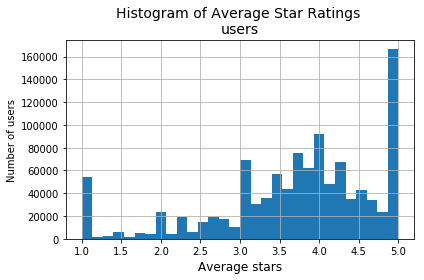

In [78]:
users.average_stars.hist(bins=30)
plt.title("Histogram of Average Star Ratings \nusers", size=14)
plt.ylabel('Number of users')
plt.xlabel('Average stars', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("star_counts_users.png",format="png", dpi=300)
plt.show()

This histogram shows a strange pattern; there are sharp peaks around 1, 2, 2.25, 3, 3.5, 4, 4.25, 4.5, and 5. SThese could be from the users who left only a few reviews. Thus, I will filter out users who left less than 10 reviews and see if those peaks disappear.

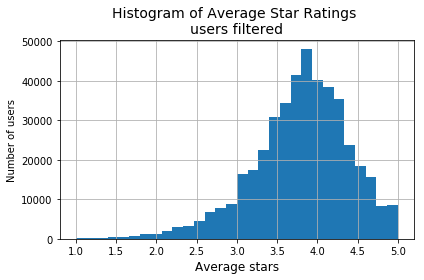

In [79]:
users[users.review_count >= 10].average_stars.hist(bins=30)
plt.title("Histogram of Average Star Ratings \nusers filtered", size=14)
plt.ylabel('Number of users')
plt.xlabel('Average stars', fontsize=12)
plt.tight_layout() # need for savefig
plt.savefig("star_counts_users_filtered.png",format="png", dpi=300)
plt.show()

- Yes, those peaks are gone now!! The distribution of user average stars is unimodal with a peak around 3.9 and is left-skewed. 

- This is very similar to the distribution of business average stars we saw in the stars section for the business dataset. The graph was barplot (not histogram) because the average stars for businesses were values rounded to half-stars (1, 1.5, 2, ..., 4.5, 5).

#### Review count

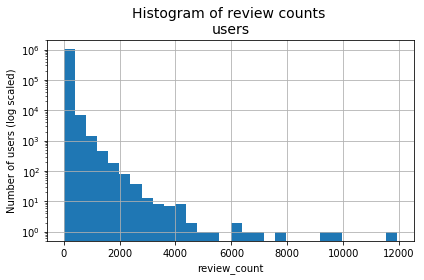

In [80]:
users.review_count.hist(bins=30)
plt.yscale('log')
plt.title('Histogram of review counts \nusers', size=14)
plt.ylabel('Number of users (log scaled)')
plt.xlabel('review_count')
plt.tight_layout() # need for savefig
plt.savefig("review_counts_users.png",format="png", dpi=300)
plt.show()

The distribution of review counts for users is highly right-skewed. There are about 8 people who left even more than 6000 reviews. Who are they? Where were they?

In [81]:
users[users.review_count > 6000][['average_stars','name', 'review_count', 'yelping_since','user_id']]

,average_stars,name,review_count,yelping_since,user_id
612296,3.84,Shila,11942,2010-10-17,RtGqdDBvvBCjcu5dUqwfzA
912339,3.82,Fox,6321,2009-05-26,Hi10sGSZNxQH3NLyWSZ1oA
1065202,3.80,Kim,9811,2006-05-31,P5bUL3Engv-2z6kKohB6qQ
1117323,3.49,George,7755,2009-11-06,8RcEwGrFIgkt9WQ35E6SnQ
1125436,3.60,Bruce,9278,2009-03-08,hWDybu_KvYLSdEFzGrniTw
1143354,3.32,Kenneth,6719,2011-06-10,Xwnf20FKuikiHcSpcEbpKQ
1366811,3.70,Nijole,6863,2011-11-29,nmdkHL2JKFx55T3nq5VziA
1399461,3.31,Jennifer,6082,2009-11-09,CxDOIDnH8gp9KXzpBHJYXw


They have normal average star ratings (between 3 and 4) and have been using Yelp for many years. The top user 'Shila' left almost 12,000 food and restaurant reviews.

In [82]:
top_user_id = users[users.review_count == users.review_count.max()].user_id.iloc[0]
top_user_id

'RtGqdDBvvBCjcu5dUqwfzA'

In [83]:
# top-user review summary
reviews[reviews.user_id == top_user_id].describe()

,useful,cool,funny,stars
count,62.000000,62.000000,62.000000,62.000000
mean,0.354839,0.225806,0.177419,4.403226
std,0.629774,0.458771,0.462502,0.877023
min,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,5.000000
75%,1.000000,0.000000,0.000000,5.000000
max,3.000000,2.000000,2.000000,5.000000


This shows only 62 reviews by the top user are in the review dataset for several reasons. The original datasets provided by Yelp are subsets of businesses, reviews, and user data. Moreover, I only selected businesses in food and restaurant categories, reviews for businesses in those categories and users who left reviews for those businesses. Thus, having 62 instead of 11,942 is not surprising. For this reason, it is better to use the review dataset to investigate who are heavy users and where they were.

In [84]:
reviews.groupby(['user_id'])['review_id'].count().sort_values(ascending=False)[:10]

user_id
CxDOIDnH8gp9KXzpBHJYXw    3057
bLbSNkLggFnqwNNzzq-Ijw    1684
DK57YibC5ShBmqQl97CKog    1160
PKEzKWv_FktMm2mGPjwd0Q    1075
d_TBs6J3twMy9GChqUEXkg    1061
cMEtAiW60I5wE_vLfTxoJQ    1046
ELcQDlf69kb-ihJfxZyL0A     990
U4INQZOPSUaj8hMjLlZ3KA     902
UYcmGbelzRa0Q6JqzLoguw     807
62GNFh5FySkA3MbrQmnqvg     769
Name: review_id, dtype: int64

The top user with id CxDOIDnH8gp9KXzpBHJYXw was actually in the list of top users above from the user dataset (Jennifer). She has over 3000 reviews in the review dataset and now I will investigate her review activity.

In [85]:
top_user_id = 'CxDOIDnH8gp9KXzpBHJYXw'

In [86]:
businesses_ids_top_user = reviews[reviews.user_id == top_user_id]['business_id']
businesses_top_user = businesses[businesses.business_id.isin(businesses_ids_top_user)]

In [87]:
businesses_top_user.city_state.value_counts()[:20]

Toronto, ON                   1268
Markham, ON                    572
Richmond Hill, ON              295
Scarborough, ON                210
Vaughan, ON                    133
North York, ON                  96
MontrÃ©al, QC                   92
Thornhill, ON                   87
Mississauga, ON                 44
Woodbridge, ON                  24
Oakville, ON                    23
Pickering, ON                   19
Newmarket, ON                   19
Aurora, ON                      18
Brampton, ON                    16
Unionville, ON                  16
Whitby, ON                      15
Stouffville, ON                 14
Etobicoke, ON                   13
Whitchurch-Stouffville, ON      12
Name: city_state, dtype: int64

She was mostly in cities in Ontario, Canada.

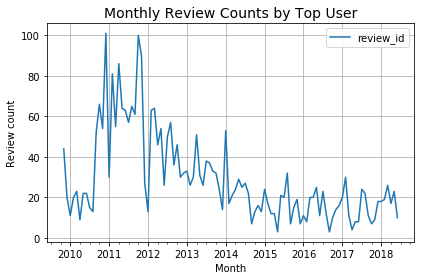

In [88]:
condition = (reviews.user_id ==top_user_id)
reviews[condition][['date','review_id']].set_index('date').resample('M').count().plot()
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Review count')
plt.title('Monthly Review Counts by Top User', size=14)
plt.tight_layout() # need for savefig
plt.savefig("monthly_review_counts_top_user.png",format="png", dpi=300)
plt.show()

She left around 20 reviews every month and between 2010 and 2013 she was even more active. For some months, she left over 100 reviews for food and restaurant businesses.

In [89]:
#condition = (reviews.user_id ==top_user_id)&(reviews.date<date(2012,1,1))&(reviews.date>=date(2010,11,1))
#reviews[condition][['date','review_id']].set_index('date').resample('M').count().plot()
#plt.grid(True)
#plt.xlabel('Month')
#plt.ylabel('Review count')
#plt.title('Monthly Review Counts by Top User', size=14)
#plt.show()

In [90]:
## 2010 december activity
#condition = (reviews.user_id ==top_user_id)&(reviews.date<=date(2010,12,31))&(reviews.date>=date(2010,12,1))
#reviews[condition]
#ids = reviews[condition]['business_id']
#businesses[businesses.business_id.isin(ids)]

#### Yelping since

In [91]:
type(users.yelping_since[0])

str

In [92]:
users['yelping_since'] = pd.to_datetime(users.yelping_since)
users['yelping_since'][:3]

0   2015-09-28
1   2015-09-05
2   2016-07-21
Name: yelping_since, dtype: datetime64[ns]

In [93]:
type(users.yelping_since[0])

pandas._libs.tslib.Timestamp

In [94]:
first_yelping = users.yelping_since.min()
first_yelping

Timestamp('2004-10-12 00:00:00')

In [95]:
last_yelping =users.yelping_since.max()
last_yelping

Timestamp('2018-07-02 00:00:00')

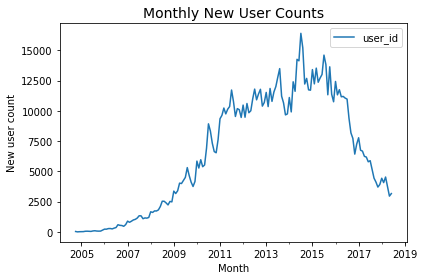

In [96]:
condition = (users.yelping_since < date(2018,7,1))
users[condition][['yelping_since','user_id']].set_index('yelping_since').resample('M').count().plot()
plt.xlabel('Month')
plt.ylabel('New user count')
plt.title('Monthly New User Counts', size=14)
plt.tight_layout() # need for savefig
plt.savefig("monthly_new_user_counts.png",format="png", dpi=300)
plt.show()

This time series graph shows how new users increased over time and then started to decrease after the peak in 2014. The datset does not show who left Yelp, so I cannot show the number of cumulated users.

Is there any relationship between the Yelp join time and average star ratings of users? To use more credible average stars of users, I filtered out users who left less than 10 reviews.

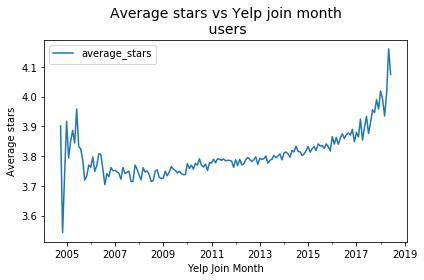

In [108]:
condition = (users.review_count >=10)&(users.yelping_since < date(2018,7,1))
users[condition][['yelping_since','average_stars']].set_index('yelping_since').resample('M').mean().plot()
plt.xlabel('Yelp Join Month')
plt.ylabel('Average stars')
plt.title('Average stars vs Yelp join month\n users', size=14)
plt.tight_layout() # need for savefig
plt.savefig("average_stars_vs_yelp_join_month_users.png",format="png", dpi=300)
plt.show()

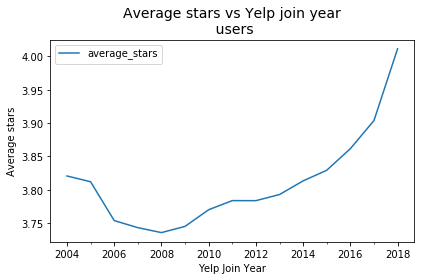

In [120]:
condition = (users.review_count >=10)&(users.yelping_since < date(2018,7,1))
users[condition][['yelping_since','average_stars']].set_index('yelping_since').resample('Y').mean().plot()
plt.xlabel('Yelp Join Year')
plt.ylabel('Average stars')
plt.title('Average stars vs Yelp join year\n users', size=14)
plt.tight_layout() # need for savefig
plt.savefig("average_stars_vs_yelp_join_year_users.png",format="png", dpi=300)
plt.show()

This graph shows users joined Yelp earlier tend to have lower average stars (ignoring the first couple years). This suggests that Yelp join time (e.g., dates, months, or years since joining) might be a useful user feature when predicting stars.

In [119]:
#condition = (users.review_count >=10)&(users.yelping_since < date(2018,7,1))
#ts = users[condition][['yelping_since','average_stars']]
#ts['join_year'] = ts.yelping_since.apply(lambda x: x.strftime('%Y'))
#
#fig, ax = plt.subplots(figsize=(12,5))
#sns.violinplot(ts.join_year, ts.average_stars, ax=ax)
#plt.title('Ditribution of Average Stars of users\ngrouped by join year', size=14)
##plt.tight_layout() # need for savefig
##plt.savefig(".png",format="png", dpi=300)
#plt.show()

### Merging datasets

Now I am going to use the review dataset as the main dataset and merge useful columns of business and user datasets into the review dataset. 

In [148]:
reviews.columns

Index(['useful', 'date', 'user_id', 'review_id', 'cool', 'funny',
       'business_id', 'stars'],
      dtype='object')

In [149]:
businesses.columns

Index(['business_id', 'name', 'city', 'state', 'latitude', 'longitude',
       'stars', 'review_count', 'is_open', 'categories', 'restaurant', 'food',
       'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2',
       'RestaurantsTakeOut', 'city_state'],
      dtype='object')

In [157]:
businesses.rename(columns={'RestaurantsPriceRange2':'price_range',
                          'name':'business_name'}, inplace=True)

In [158]:
businesses.columns

Index(['business_id', 'business_name', 'city', 'state', 'latitude',
       'longitude', 'stars', 'review_count', 'is_open', 'categories',
       'restaurant', 'food', 'BusinessAcceptsCreditCards', 'price_range',
       'RestaurantsTakeOut', 'city_state'],
      dtype='object')

In [160]:
df = pd.merge(reviews[['review_id','user_id','business_id','stars','date']], 
              businesses[['business_id', 'business_name','city', 'state', 'city_state',
                          'latitude', 'longitude','price_range','categories']], 
              how='left', on='business_id' )

In [156]:
users.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [161]:
users.rename(columns = {'name':'user_name'}, inplace=True)

In [162]:
df = pd.merge(df, users[['user_id','user_name','yelping_since']], 
              how='left', on='user_id')

In [163]:
df.head(3)

,review_id,user_id,business_id,stars,date,business_name,city,state,city_state,latitude,longitude,price_range,categories,user_name,yelping_since
0,x7mDIiDB3jEiPGPHOmDzyw,msQe1u7Z_XuqjGoqhB0J5g,iCQpiavjjPzJ5_3gPD5Ebg,2,2011-02-25,Secret Pizza,Las Vegas,NV,"Las Vegas, NV",36.109837,-115.174212,1.0,"[Pizza, Restaurants]",Melissa,2011-02-24
1,dDl8zu1vWPdKGihJrwQbpw,msQe1u7Z_XuqjGoqhB0J5g,pomGBqfbxcqPv14c3XH-ZQ,5,2012-11-13,Leticia's Mexican Cocina,Las Vegas,NV,"Las Vegas, NV",36.298875,-115.280088,2.0,"[Restaurants, Mexican, Bars, Nightlife]",Melissa,2011-02-24
2,LZp4UX5zK3e-c5ZGSeo3kA,msQe1u7Z_XuqjGoqhB0J5g,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,H&H BBQ Plus 2,Las Vegas,NV,"Las Vegas, NV",36.241809,-115.234495,2.0,"[American (New), Barbeque, Restaurants]",Melissa,2011-02-24


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017884 entries, 0 to 4017883
Data columns (total 15 columns):
review_id        object
user_id          object
business_id      object
stars            int64
date             datetime64[ns]
business_name    object
city             object
state            object
city_state       object
latitude         float64
longitude        float64
price_range      float64
categories       object
user_name        object
yelping_since    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(9)
memory usage: 490.5+ MB


In [165]:
df.to_csv('reviews_business_user_info.csv')

### References:

https://matplotlib.org/basemap/users/installing.html
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

Basemap installation in Windows:

I followed the instruction here
https://stackoverflow.com/questions/18109859/how-to-install-matplotlib-basemap-module-on-windows-7-with-winpython-or-any-pyt

1. Activate environment (skip if environment is not used)
2. cd to the folder where python is located (https://pythontips.com/2013/07/30/python-install-location-and-version/ tips for checking python version and location)
3. pip install pyproj-1.9.6-cp36-cp36m-win_amd64.whl 
(.whl file was downloaded from https://www.lfd.uci.edu/~gohlke/pythonlibs/#pyproj and moved to the python folder)
4. pip install basemap-1.2.0-cp36-cp36m-win_amd64.whl
(.whl file was downloaded from https://www.lfd.uci.edu/~gohlke/pythonlibs/ and moved to the python folder) 

<a href='#Top'>Return to Top</a>